In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import scipy as sp
from scipy import signal as sig

In [2]:
coordination_raw = pd.read_csv('20210627_0949_5255_20140618_04_03DLC_resnet50_Mouse CoordinationJun25shuffle1_1030000.csv', 
                               skiprows = 3,
                               names = ['coords', 'fr_x', 'fr_y', 'fr_likelihood', 'fl_x', 'fl_y', 'fl_likelihood', 
                                        'br_x', 'br_y', 'br_likelihood', 'bl_x', 'bl_y', 'bl_likelihood', 
                                        'nose_x', 'nose_y', 'nose_likelihood'])

print(coordination_raw)

      coords         fr_x        fr_y  fr_likelihood         fl_x        fl_y  \
0          0   443.315613  181.526611       0.001558   140.455261  208.950378   
1          1   443.360840  181.510834       0.001532   137.211105  209.982422   
2          2   443.514923  181.536667       0.001707   140.189072  209.063095   
3          3   443.387512  181.514710       0.001679   140.349289  208.946564   
4          4   443.454437  181.512924       0.001356   140.411697  208.896515   
...      ...          ...         ...            ...          ...         ...   
6091    6091  1061.123047  114.941803       1.000000  1104.827759  154.172165   
6092    6092  1061.133301  114.840744       1.000000  1104.869019  154.571777   
6093    6093  1061.020264  114.983009       1.000000  1104.777344  155.216690   
6094    6094  1061.119507  114.892235       1.000000  1104.693359  155.713989   
6095    6095  1061.044067  114.957504       1.000000  1104.719116  156.151871   

      fl_likelihood        

In [3]:
coordination_data = coordination_raw[5217:] #only look at frame 5217 and after bc that's when mouse is walking

column_list = ['fr_x', 'fr_y', 'fl_x', 'fl_y', 'br_x', 'br_y', 'bl_x', 'bl_y', 'nose_x', 'nose_y']
body_location = coordination_data[column_list]

body_location.head()

fr_x        fr_y        fl_x        fl_y        br_x        br_y  \
5217  149.067764  250.491165  279.327454  254.321396  122.161079  180.352554   
5218  157.163315  245.877182  277.350922  252.450165  122.208794  180.262848   
5219  164.136169  242.368866  275.737000  250.682678  122.142273  180.225677   
5220  172.518234  238.964447  275.159698  250.612320  122.096207  180.120911   
5221  179.833054  236.143982  274.849609  250.655380  122.059532  180.114090   

           bl_x        bl_y      nose_x      nose_y  
5217  58.153610  296.760956  362.242767  208.773773  
5218  60.647331  297.201599  364.329437  207.810959  
5219  64.671478  297.055359  366.049072  207.302536  
5220  68.479126  296.720642  367.880859  205.903656  
5221  72.272064  296.306976  369.718292  204.729355

In [4]:
body_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 5217 to 6095
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fr_x    879 non-null    float64
 1   fr_y    879 non-null    float64
 2   fl_x    879 non-null    float64
 3   fl_y    879 non-null    float64
 4   br_x    879 non-null    float64
 5   br_y    879 non-null    float64
 6   bl_x    879 non-null    float64
 7   bl_y    879 non-null    float64
 8   nose_x  879 non-null    float64
 9   nose_y  879 non-null    float64
dtypes: float64(10)
memory usage: 68.8 KB


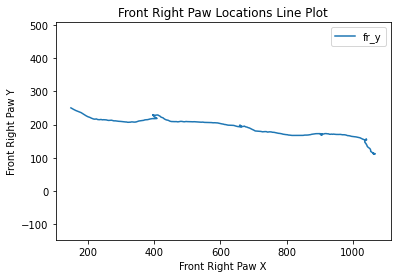

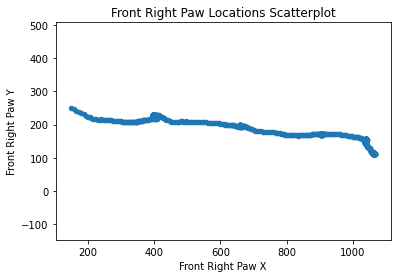

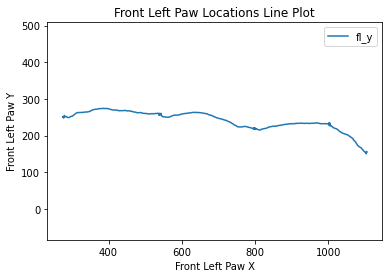

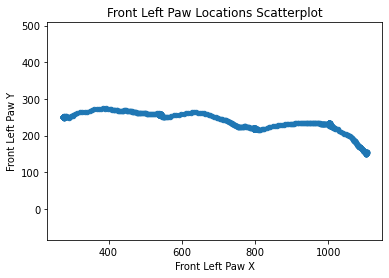

In [5]:
coordination_data.plot('fr_x', 'fr_y')
plt.title('Front Right Paw Locations Line Plot')
plt.xlabel('Front Right Paw X')
plt.ylabel('Front Right Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('fr_x', 'fr_y')
plt.title('Front Right Paw Locations Scatterplot')
plt.xlabel('Front Right Paw X')
plt.ylabel('Front Right Paw Y')
plt.axis('equal')
plt.show()

###

coordination_data.plot('fl_x', 'fl_y')
plt.title('Front Left Paw Locations Line Plot')
plt.xlabel('Front Left Paw X')
plt.ylabel('Front Left Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('fl_x', 'fl_y')
plt.title('Front Left Paw Locations Scatterplot')
plt.xlabel('Front Left Paw X')
plt.ylabel('Front Left Paw Y')
plt.axis('equal')
plt.show()

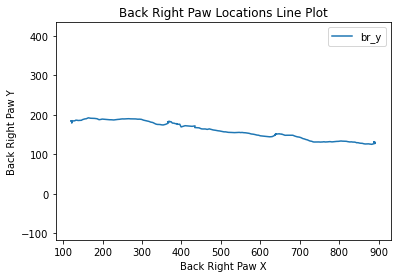

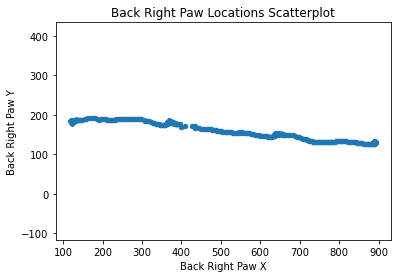

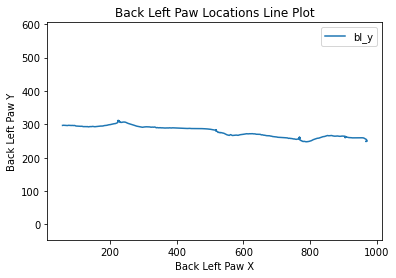

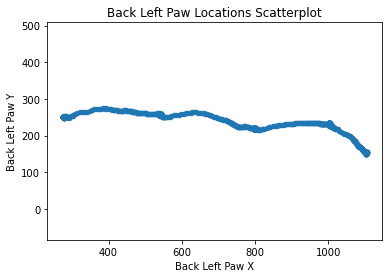

In [6]:
coordination_data.plot('br_x', 'br_y')
plt.title('Back Right Paw Locations Line Plot')
plt.xlabel('Back Right Paw X')
plt.ylabel('Back Right Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('br_x', 'br_y')
plt.title('Back Right Paw Locations Scatterplot')
plt.xlabel('Back Right Paw X')
plt.ylabel('Back Right Paw Y')
plt.axis('equal')
plt.show()

###

coordination_data.plot('bl_x', 'bl_y')
plt.title('Back Left Paw Locations Line Plot')
plt.xlabel('Back Left Paw X')
plt.ylabel('Back Left Paw Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('fl_x', 'fl_y')
plt.title('Back Left Paw Locations Scatterplot')
plt.xlabel('Back Left Paw X')
plt.ylabel('Back Left Paw Y')
plt.axis('equal')
plt.show()

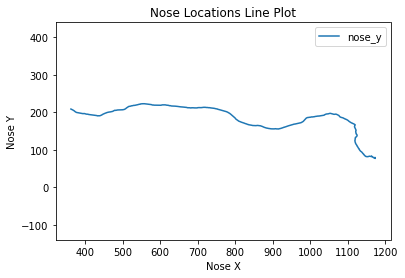

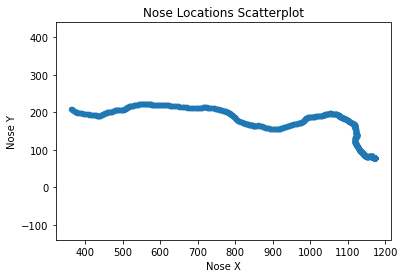

In [7]:
coordination_data.plot('nose_x', 'nose_y')
plt.title('Nose Locations Line Plot')
plt.xlabel('Nose X')
plt.ylabel('Nose Y')
plt.axis('equal')
plt.show()

coordination_data.plot.scatter('nose_x', 'nose_y')
plt.title('Nose Locations Scatterplot')
plt.xlabel('Nose X')
plt.ylabel('Nose Y')
plt.axis('equal')
plt.show()

In [8]:
#using numpy
dt = 0.002 # Frame period in seconds
mmpx = 0.1 # mm per pixel; NOT TRUE VALUE!

#body_velocities = mmpx*np.diff(body_location)/dt # pixels/sec

body_velocities = body_location.diff()*(mmpx/dt)

body_velocities.head()
body_velocities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 5217 to 6095
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fr_x    878 non-null    float64
 1   fr_y    878 non-null    float64
 2   fl_x    878 non-null    float64
 3   fl_y    878 non-null    float64
 4   br_x    878 non-null    float64
 5   br_y    878 non-null    float64
 6   bl_x    878 non-null    float64
 7   bl_y    878 non-null    float64
 8   nose_x  878 non-null    float64
 9   nose_y  878 non-null    float64
dtypes: float64(10)
memory usage: 68.8 KB


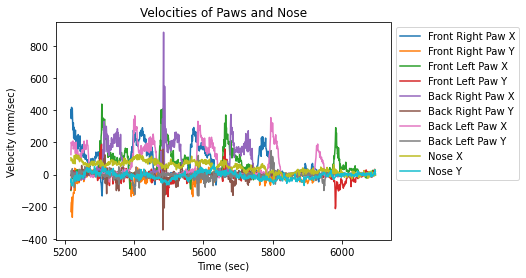

In [9]:
column_names = ['Front Right Paw X', 'Front Right Paw Y', 'Front Left Paw X', 'Front Left Paw Y', 
                'Back Right Paw X', 'Back Right Paw Y', 'Back Left Paw X', 'Back Left Paw Y', 
                'Nose X', 'Nose Y']

plt.plot(body_velocities)
plt.title('Velocities of Paws and Nose')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (mm/sec)')
plt.legend(column_names, bbox_to_anchor=(1,1), loc="upper left")

In [10]:
#separating datasets for x and y velocities

x_velocities = body_velocities.loc[:, ['fr_x', 'fl_x', 'br_x', 'bl_x', 'nose_x']]
y_velocities = body_velocities.loc[:, ['fr_y', 'fl_y', 'br_y', 'bl_y', 'nose_y']]

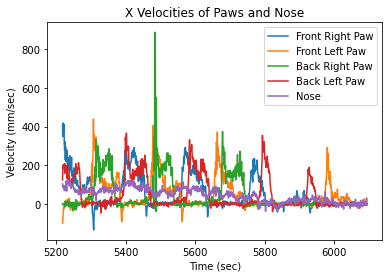

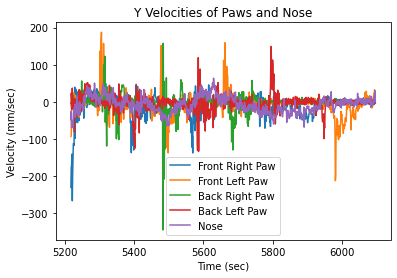

In [11]:
#separated plots for x and y velocities

#x velocities
plt.plot(x_velocities)
plt.title('X Velocities of Paws and Nose')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (mm/sec)')
plt.legend(['Front Right Paw', 'Front Left Paw', 'Back Right Paw', 'Back Left Paw', 'Nose'])
plt.show()

#y velocities
plt.plot(y_velocities)
plt.title('Y Velocities of Paws and Nose')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (mm/sec)')
plt.legend(['Front Right Paw', 'Front Left Paw', 'Back Right Paw', 'Back Left Paw', 'Nose'])
plt.show()

In [12]:
#attempting convolution of the derivative data (1st attempt, see later cells for better code)

filter_length = 29  #setting the N value for the kernal
smooth_kernal = np.ones(filter_length)*(1/filter_length) #np.ones(N)*(1/N) is a 'box' filter with N setting the amount of smoothing

velocity_array = body_velocities.to_numpy()
velocity_array.shape

(879, 10)

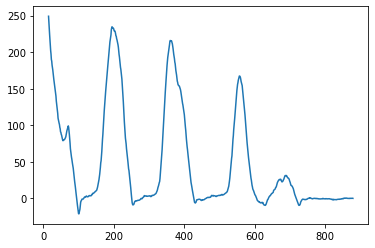

In [13]:
#making smoothed velocity (AKA doing the convolution) for individual column, fr_x

velocity_current = velocity_array[:, 0]
velocity_current_smooth = np.convolve(velocity_current, smooth_kernal, mode = 'same')
plt.plot(velocity_current_smooth)

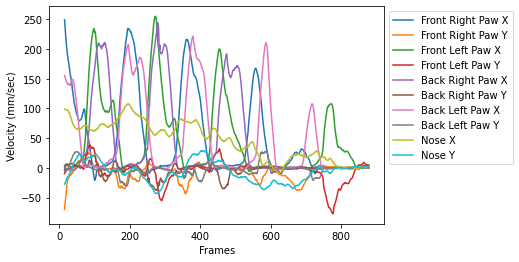

In [14]:
#looping through columns to plot all their smoothed velocities simultaneously

for column in velocity_array.T:
    column_convolved = np.convolve(column, smooth_kernal, mode = 'same')
    plt.plot(column_convolved)
    plt.xlabel('Frames')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(column_names, bbox_to_anchor = (1,1), loc = "upper left")

In [15]:
#making a time axis

frame_rate = 500  # frames per second
num_frames = 879  #number of frames tracked, looked at number of rows in body_location dataframe for this

frame_times = np.linspace(0, (num_frames-1)/frame_rate, num = num_frames)  # seconds

Text(0.5, 1.0, 'N = 29')

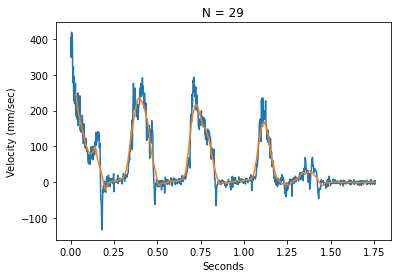

In [16]:
#plotting the time axis, comparing velocity unsmoothed vs smoothed

plt.plot(frame_times, velocity_current, frame_times, velocity_current_smooth)
plt.xlabel('Seconds')
plt.ylabel('Velocity (mm/sec)')
plt.title(f'N = {filter_length}')

In [17]:
#Writing a function for calculating how to slice convolved dataset for centering

def calculate_slicing():
    N = (int(input("Input an odd value of 'N': ")))
    slice_start = (N - 1) // 2   #note: uses double slashes, "//", to make slice_start integer instead of float
    slice_stop = slice_start * -1
    print("Slice [" + str(slice_start) + ":" + str(slice_stop) + "]")
    
calculate_slicing() #HA IT WORKS

Input an odd value of 'N': 35
Slice [17:-17]


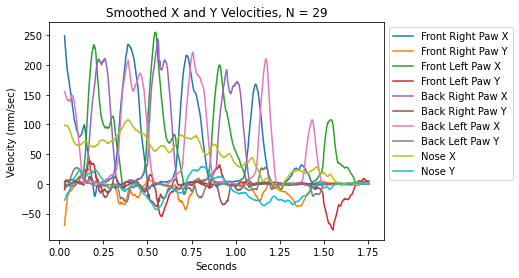

In [18]:
#Re-looping through columns to plot all smoothed velocities w/ time axis

for column in velocity_array.T:
    column_smoothed = np.convolve(column, smooth_kernal, mode = 'same')
    plt.plot(frame_times, column_smoothed)
    plt.title(f'Smoothed X and Y Velocities, N = {filter_length}')
    plt.xlabel('Seconds')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(column_names, bbox_to_anchor = (1,1), loc = "upper left")

#looking at the plot, looks like Nose X velocity increases every other paw peak
#meanwhile Nose Y velocity oscillates at maybe half speed of X 
#--> nose doesn't move left/right (up/down on video) as much?
#from plot + video, limbs diagonal to e/o move together 
#(i.e. Back Left Paw X seems to follow Front Right Paw X since they're slightly offset)
#Y velocities generally don't vary as much since mouse mostly moving straight w/ maybe slight curve at the end
#both Back Paw X-velocities seem to have dual peaks close together 
#while Front Paw X-velocities slightly less close together and 2nd peak much lower than 1st
#not sure why this happens, maybe back paws move more smoothly so peaks closer together? 
#whereas front paws lift, move forward, pause slightly, then come down so 2nd peak lower??

#just looking at the video, walk cycle seems to go Front Right and Back Left --> Front Left and Back Right --> repeat
#can mice be "right-handed"? internet says squirrels can have paw lateralization, what about mice?
#diagonal limbs move as unit, w/in those units the front paw v. slightly leads (during movement in straight line anyway)
#when mouse ~halfway across test chamber, moves slightly to its right to center itself (water in top right corner)
#nose usually stays aligned to body in straight line until whisker contact w/ water reward, then sharp turn toward water
#BUT when mouse coming out of turn + body at slight diagonal, nose stayed at roughly same Y value 
#while body straightened out until mouse was moving parallel to chamber wall
#is this comparable to how squirrels + cats land on their feet? point head + lock on to target, arrange body to follow?

In [19]:
#exploring how velocities of diff. body parts related to e/o
#using body_velicites bc Pandas' max() function requires Pandas dataframe, keep in mind this is unsmoothed!

print(body_velocities.max().sort_values(ascending = False)) #getting max velocities

#looking at the unsmoothed velocities, Back Right Paw X's velocity is twice as high as either front paw
#why isn't this reflected in the smoothed plot though?? did the smoothing blunt it that much??
#Front Left and Right peak X-velocities similar, makes sense since mouse moved in semi-straight line at semi-consistent pace
#Back Left peak X-velocity closer to front paws but a bit slower
#all the peak Y-velocities lower than peak X-velocities (except for Nose X), makes sense since mouse mostly moved forward



print(body_velocities.idxmax().sort_values()) #finding which frame max velocities appear on

#Front paw max velocities are reached sooner than back paw max velocities, supports idea that front paws lead slightly
#note: fps = 500 for this video
#Front Right X velocity peaks 87 frames (0.174 sec) sooner than Front left X velocity
#Back Left X velocity peaks 83 frames (0.166 sec) sooner than Back Right X velocity (similar to front paws)
#frames bt Front Right X and Back Left X velocity peaks: 182 (0.364 sec)
#frames bt Front Left X and Back Right X velocity peaks: 178 (0.356 sec)
# --> suggests alignment w/in front and back paws instead of diagonal?? since there's a longer gap bt diagonals
#or maybe it means that front paw movement overlaps more? maybe since mouse can balance weight on back paws easier
#than balancing weight on front paws --> back paws stay stationary longer

br_x      887.387085
fl_x      439.465330
fr_x      419.103245
bl_x      366.470340
fl_y      187.500000
br_y      157.730865
bl_y      149.256130
nose_x    125.042725
fr_y       81.609340
nose_y     63.682555
dtype: float64
fr_x      5220
fl_y      5306
fr_y      5307
fl_x      5307
bl_x      5402
nose_x    5416
br_y      5484
br_x      5485
nose_y    5629
bl_y      5795
dtype: int64


PRELIMINARY POTENTIAL FINDINGS/IDEAS

-Paws diagonal to each other are aligned/coordinated, front paws also lead back paws slightly
-Paws move to bring body into alignment with nose if not already in straight line (nose acts like pivot point)
-Front paws generally move more quickly than back paws and spend less time stationary

In [20]:
#calculating the total velocities (pythagorean theorem! total_velocities^2 = x_velocities^2 + y_velocities^2)

total_velocities = np.sqrt(x_velocities[1:].to_numpy()**2 + y_velocities[1:].to_numpy()**2) # Very dangerous, relies on column alignment

sig.find_peaks #only use this on smoothed data!

total_velocities.shape

#note: tried to use np.linalg.norm, but got a single number for some reason instead of an array

(878, 5)

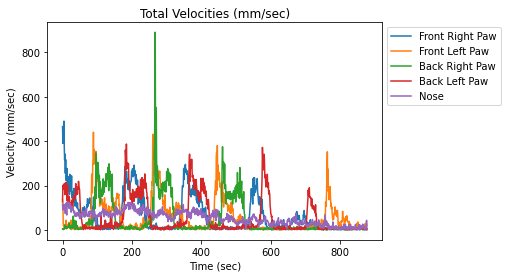

In [21]:
total_column_names = ['Front Right Paw', 'Front Left Paw', 'Back Right Paw', 'Back Left Paw', 'Nose']

plt.plot(total_velocities)
plt.title('Total Velocities (mm/sec)')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (mm/sec)')
plt.legend(total_column_names, bbox_to_anchor = (1,1), loc = "upper left")

In [22]:
#Breaking up smoothed velocity graphs: Making the Arrays

x_velocities_array = x_velocities.to_numpy()
x_column_names = ['Front Right X', 'Front Left X', 'Back Right X', 'Back Left X', 'Nose X']

y_velocities_array = y_velocities.to_numpy()
y_column_names = ['Front Right Y', 'Front Left Y', 'Back Right Y', 'Back Left Y', 'Nose Y']



#need to make diff. time axis for total velocities bc x and y velocities have an extra NaN row at the top for some reason

#frame_rate same, 500 fps
total_velocity_frames = 878  #number of frames tracked for total velocities, 1 less than x and y individually
total_velocity_frame_times = np.linspace(0, (total_velocity_frames-1)/frame_rate, num = total_velocity_frames)  #seconds

#total_velocities already an array
#total_column_names already a variable

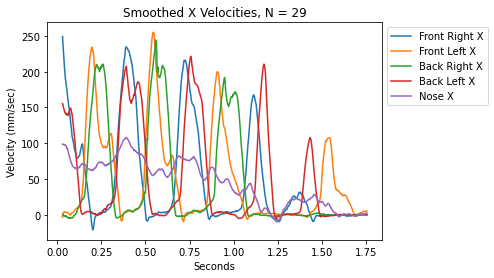

In [23]:
#Breaking up smoothed velocity graphs: Plotting the Smoothed X Velocities

for x_column in x_velocities_array.T:
    x_column_smoothed = np.convolve(x_column, smooth_kernal, mode = 'same')
    plt.plot(frame_times, x_column_smoothed)
    plt.title(f'Smoothed X Velocities, N = {filter_length}')
    plt.xlabel('Seconds')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(x_column_names, bbox_to_anchor = (1,1), loc = "upper left")

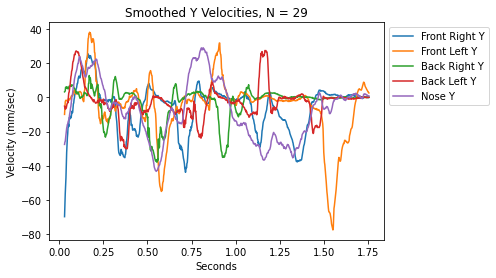

In [24]:
#Breaking up smoothed velocity graphs: Plotting the Smoothed Y Velocities

for y_column in y_velocities_array.T:
    y_column_smoothed = np.convolve(y_column, smooth_kernal, mode = 'same')
    plt.plot(frame_times, y_column_smoothed)
    plt.title(f'Smoothed Y Velocities, N = {filter_length}')
    plt.xlabel('Seconds')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(y_column_names, bbox_to_anchor = (1,1), loc = "upper left")

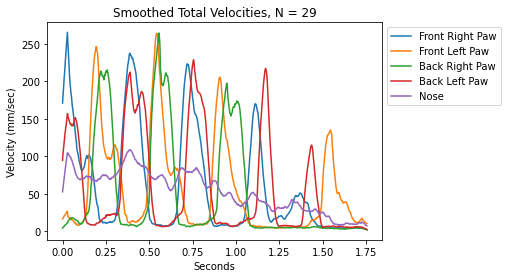

In [25]:
#Breaking up smoothed velocity graphs: Plotting the Smoothed Total Velocities

for total_column in total_velocities.T:
    total_column_smoothed = np.convolve(total_column, smooth_kernal, mode = 'same')
    plt.plot(total_velocity_frame_times, total_column_smoothed)
    plt.title(f'Smoothed Total Velocities, N = {filter_length}')
    plt.xlabel('Seconds')
    plt.ylabel('Velocity (mm/sec)')
    plt.legend(total_column_names, bbox_to_anchor = (1,1), loc = "upper left")

In [26]:
#Scratch

total_column_smoothed.shape

(878,)

In [27]:
#loading in data from analysis iteration 6 of the 4 new videos, corresponding labeled videos:
#20210712_0817a_5255_20140623_04_11.mp4
#20210712_0817b_5255_20140627_04_09.mp4
#20210712_0817c_5255_20140703_02_01.mp4
#20210712_0817d_5255_20140703_02_21.mp4

#coordination_raw = pd.read_csv('20210627_0949_5255_20140618_04_03DLC_resnet50_Mouse CoordinationJun25shuffle1_1030000.csv', 
                               #skiprows = 3,
                               #names = ['coords', 'fr_x', 'fr_y', 'fr_likelihood', 'fl_x', 'fl_y', 'fl_likelihood', 
                                #        'br_x', 'br_y', 'br_likelihood', 'bl_x', 'bl_y', 'bl_likelihood', 
                                 #       'nose_x', 'nose_y', 'nose_likelihood'])
#data.info()


#NOTE: UPDATE THIS FOR LATEST ITERATION

In [28]:
#SCRATCH WORK

#- - - - - 

#figuring out the formula for centering array in convolving when N is odd
#formula: [((N-1)/2):((N-1)/2)] --> slicing formula = (N - 1) / 2

#test_N = 45
#kernel_test = np.ones(test_N)*(1/test_N)
#test_smooth = np.convolve(velocity_current, kernel_test)[22:-22]



#testing the centering formula

#plt.plot(frame_times, velocity_current, frame_times, test_smooth)
#plt.xlabel('Seconds')
#plt.ylabel('Velocity (mm/sec)')

In [29]:
#SCRATCH WORK

#- - - - - 

#checking which input to the mode parameter in np.convolve() automatically centers the arrays
#using test_N = 45

#test_smooth_2 = np.convolve(a = velocity_current, v = kernel_test, mode = 'same')

#print(test_smooth.shape, test_smooth_2.shape)

#results: 
# 'full' was default, so already knew that wasn't it
# 'valid' returned 835 rows instead of 879, so that wasn't it either
# 'same' returned 879 rows, same as manual slicing! this is the one! also the only option left lol